## Logistic Regression Project
From the dataset titanic_train, We'll be trying to predict a classification- survival or deceased.
### Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data from dataset - titanic_train**

In [64]:
df = pd.read_csv('titanic_train.csv')

**Check the head of the dataframe.**

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [67]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [68]:
df.isnull().head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


# Exploratory Data Analysis

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

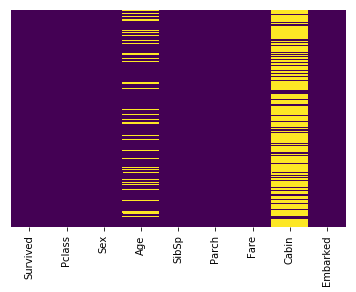

In [69]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. And Cabin column, it looks like too much of data missing So we need to drop this column.

In [70]:
df.drop('Cabin',inplace=True,axis=1)  

In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


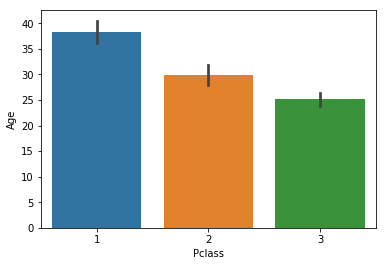

In [72]:
sns.barplot(x='Pclass',y='Age',data=df)

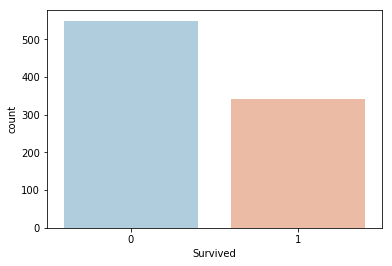

In [73]:
sns.countplot(x='Survived',data=df,palette='RdBu_r')

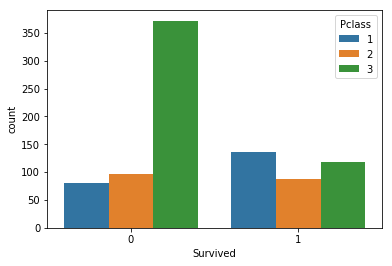

In [74]:
sns.countplot(x='Survived',hue='Pclass',data=df)

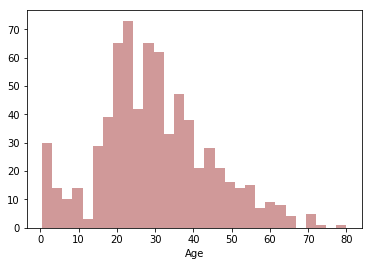

In [75]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

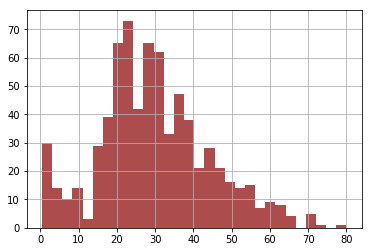

In [76]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

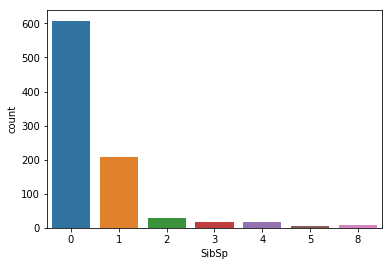

In [77]:
sns.countplot(x='SibSp',data=df)

In [78]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

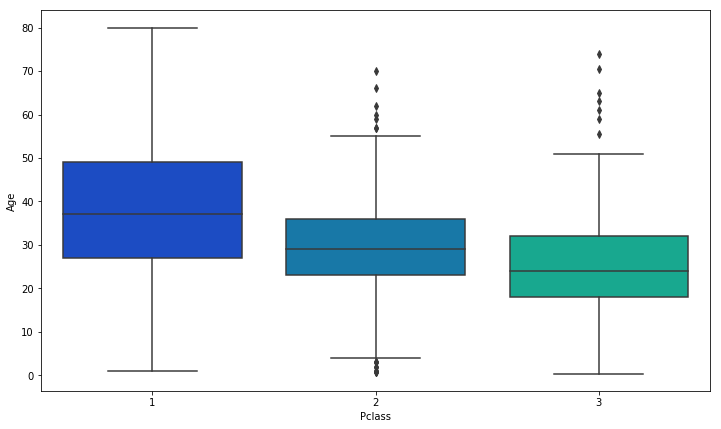

In [79]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. This is done by filling in the mean age of all the passengers (imputation).

In [80]:
def impute_age(var):
    pc = var[0]
    a = var[1]
    
    if pd.isnull(a):
        if pc == 1:
            return 38
        if pc==2:
            return 30
        else:
            return 25
    else:
        return a

In [81]:
df['Age']= df[['Pclass','Age']].apply(impute_age, axis = 1)

In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


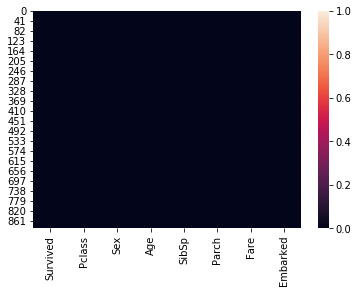

In [83]:
sns.heatmap(df.isnull())    #No NaN values in Age column of dataframe

**Now data is not null, as shown in Heatmap**

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [84]:
sex = pd.get_dummies(df['Sex'])

In [85]:
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [86]:
#We can understand data by droping last column also. So if we have n columns drop last one.
#There should have n-1 columns

**Convert categorical columns to binary values that machine learning understands.**

In [87]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [88]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [89]:
df = pd.concat([df,sex,embarked],axis=1)

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [91]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [92]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [93]:
y = df['Survived']

In [94]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [95]:
x = df.drop('Survived',axis=1)

In [96]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

Splitting data into a training set and test set.

## Train Test Split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [137]:
X_test.shape

(268, 8)

In [138]:
X_train.shape

(623, 8)

In [139]:
y_train.shape

(623,)

In [140]:
y_test.shape

(268,)

## Training and Predicting

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
lr = LogisticRegression()

In [143]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
ypred = lr.predict(X_test)

In [145]:
ypred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

### Evalution of classification model.
To evaluate classification model use confusion matrix,precision,recall,f1-score.

In [146]:
from sklearn import metrics

In [147]:
cm = metrics.confusion_matrix(y_test,ypred)

In [148]:
cm

array([[142,  19],
       [ 30,  77]], dtype=int64)

In [149]:
141+74

215

In [150]:
215

215

In [151]:
metrics.accuracy_score(y_test,ypred)

0.8171641791044776

In [152]:
metrics.accuracy_score(y_test,ypred)

0.8171641791044776

**classification_report**

In [153]:
print(metrics.classification_report(y_test,ypred),'\n')

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       161
           1       0.80      0.72      0.76       107

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268
 



In [160]:
#roc_auc score
metrics.roc_auc_score(y_test,ypred)

0.8008068729320252

**ROC AUC curve**

In [161]:
ypred_prob=lr.predict_proba(X_test)

In [162]:
ypred_prob     #It generate probability for 0 and for 1

array([[0.85334062, 0.14665938],
       [0.19020767, 0.80979233],
       [0.63012191, 0.36987809],
       [0.04466604, 0.95533396],
       [0.85682153, 0.14317847],
       [0.82461652, 0.17538348],
       [0.27835474, 0.72164526],
       [0.20165882, 0.79834118],
       [0.88050637, 0.11949363],
       [0.62067804, 0.37932196],
       [0.53684387, 0.46315613],
       [0.46005825, 0.53994175],
       [0.92793231, 0.07206769],
       [0.05938375, 0.94061625],
       [0.87818549, 0.12181451],
       [0.84799037, 0.15200963],
       [0.62688593, 0.37311407],
       [0.84068238, 0.15931762],
       [0.32798558, 0.67201442],
       [0.68637048, 0.31362952],
       [0.05273548, 0.94726452],
       [0.4239197 , 0.5760803 ],
       [0.56979001, 0.43020999],
       [0.80992819, 0.19007181],
       [0.82058343, 0.17941657],
       [0.91824722, 0.08175278],
       [0.52374606, 0.47625394],
       [0.86194989, 0.13805011],
       [0.79607087, 0.20392913],
       [0.87643708, 0.12356292],
       [0.

In [163]:
#taking probabilities of positive score only
yPredProbs = ypred_prob[:,1]

In [189]:
#roc_auc score for ypred_proba
roc_auc_score = metrics.roc_auc_score(y_test,yPredProbs)

In [190]:
roc_auc_score

0.8576362686480524

In [191]:
fpr, tpr,thresholds = metrics.roc_curve(y_test,yPredProbs)

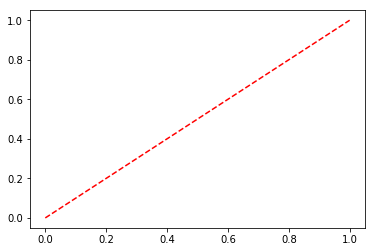

In [192]:
plt.plot([0, 1], [0, 1],'r--')

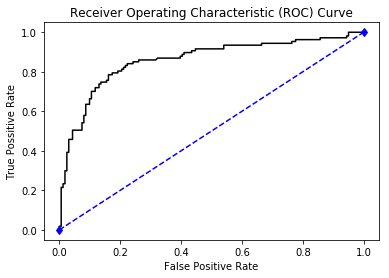

In [193]:
#This plots roc curve : 
plt.plot(fpr,tpr,'k-')
plt.plot([0, 1], [0, 1],'db--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Possitive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [194]:
thresholds.shape

(92,)

In [195]:
fpr.shape

(92,)

In [196]:
tpr.shape

(92,)